In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from muse.instr.detect_sidelobes import remove_yx_sidelobes
from muse.instr.mono_diffraction import remove_diffraction_mono

In [6]:
data_path = '/home/ec2-user/SageMaker/data/565000/'
response= xr.open_zarr(data_path + 'response_565000.zarr').compute()
response["line"] = ['Fe XIX', 'Fe XXI', '108 missing main line', 'Fe IX',
                    '171 missing main line', 'Fe XV', '284 missing main line']
spec_obs = xr.open_zarr(data_path+'spec_obs.zarr').compute()
spec_obs_70lpi = xr.open_zarr(data_path+'spec_obs_70lpi.zarr').compute()

/home/ec2-user/SageMaker/SourceCode/muse/muse/instr/detect_sidelobes.py:119: RuntimeWarning: invalid value encountered in divide
  spike_value = (np.sin(sin_arg) / sin_arg) ** 2
/home/ec2-user/SageMaker/SourceCode/muse/muse/instr/detect_sidelobes.py:119: RuntimeWarning: invalid value encountered in divide
  spike_value = (np.sin(sin_arg) / sin_arg) ** 2


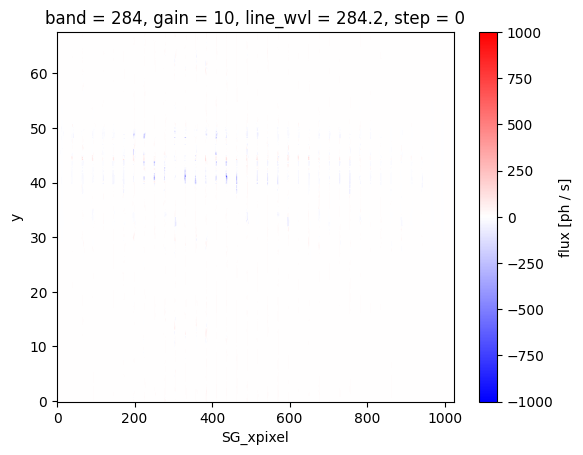

In [7]:
spec_yx_remove, slit_info = remove_yx_sidelobes(spec_obs_70lpi, response, 
                                                band=[284], transmission=[0.81], lpi=70)

(spec_yx_remove - spec_obs).flux.isel(band=2, step=0).plot(cmap='bwr', vmin=-1e3, vmax=1e3)

/home/ec2-user/SageMaker/SourceCode/muse/muse/instr/mono_diffraction.py:166: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  wave0 = response.SG_wvl.sel(line=line, slit=response.dims["slit"] // 2).values
/home/ec2-user/SageMaker/SourceCode/muse/muse/instr/mono_diffraction.py:97: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  n_step = spectrum.dims.get("step", 1)
<frozen _collections_abc>:774: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension nam

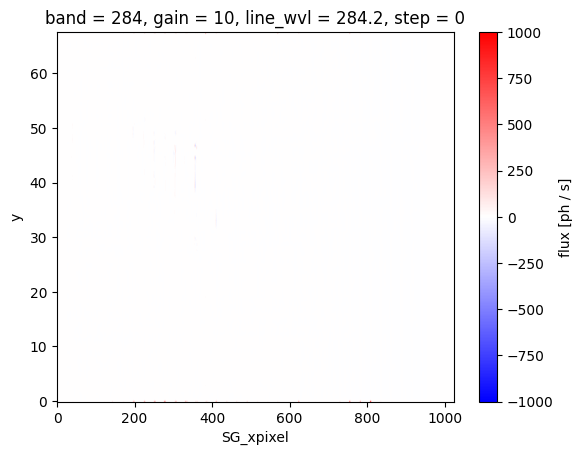

In [8]:
spec_mono_remove = remove_diffraction_mono(spec_obs_70lpi, response, lpi=70)

(spec_mono_remove - spec_obs).flux.isel(band=2, step=0).plot(cmap='bwr', vmin=-1e3, vmax=1e3)